In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. data preparation

In [29]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

In [30]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [31]:
file_name_dataset = "data/advertising.csv"
X, y = prepare_data(file_name_dataset)

In [32]:
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


### 2. model training

In [33]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0

    # for homework
    w1, w2, w3, b = (
        0.016992259082509283,
        0.0070783670518262355,
        -0.002307860847821344,
        0,
    )

    return w1, w2, w3, b

In [34]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b
    return result


y_hat = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_hat)

1.0


In [35]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss


l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [36]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi


def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [37]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b


after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

1.000005
0.50001


In [38]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y_hat, y)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update w1, w2, w3, b
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return w1, w2, w3, b, losses

In [39]:
# training the model
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)

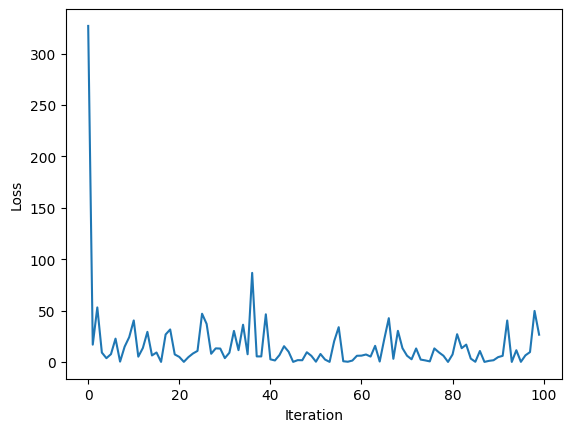

In [41]:
plt.plot(losses[:100])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [42]:
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [43]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"predicted sales is { sales }")

predicted sales is 8.176413319549823


In [44]:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss


l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


### 3. train model by N batch

In [96]:
def compute_loss_mse(y_hat, y):
    y_hat = np.array(y_hat)
    y = np.array(y)

    # Compute MSE
    mse = np.mean((y_hat - y) ** 2)
    return mse


def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y_true = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y_hat, y_true)
            # loss = compute_loss_mse(y_hat, y_true)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y_true, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y_true, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y_true, y_hat)
            dl_db = compute_gradient_b(y_true, y_hat)

            # accumulate gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # update w1, w2, w3, b
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total, lr)

        # logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

In [93]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5
)

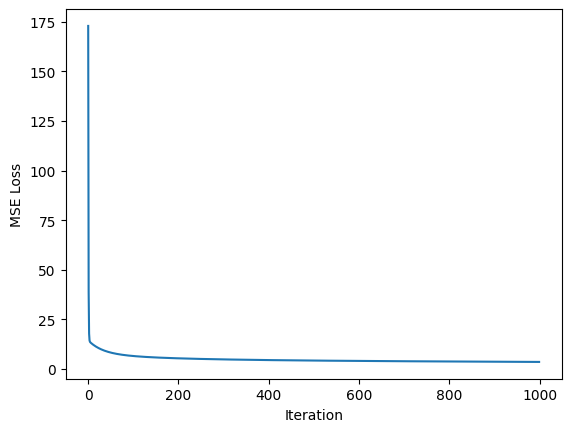

In [94]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.show()

In [95]:
print(w1, w2, w3)

0.06078275593984825 0.13502926871617948 0.015441732210224787


In [97]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5
)

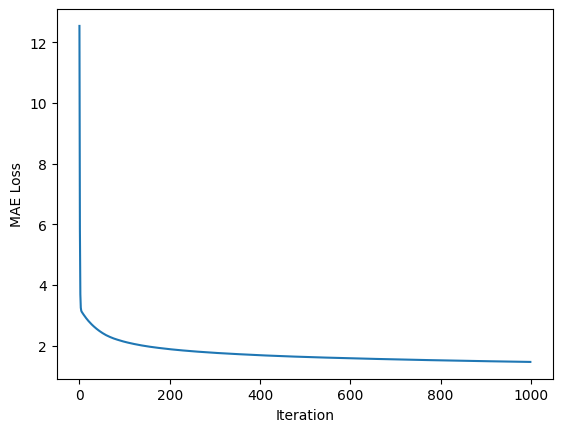

In [98]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MAE Loss")
plt.show()

In [100]:
w1, w2, w3, b, losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

In [101]:
losses[9999]

31.338878034644296